In [21]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [53]:
# Define timeframe (large)
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end) # Scrapping data from YFinance
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [23]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.988739,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.054337,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424393,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397675,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.815483,144114400


In [24]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [25]:
# Drops Data & Adj Close columns
df = df.drop(['Date', 'Adj Close'], axis = 1) # Dropping unused columns
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


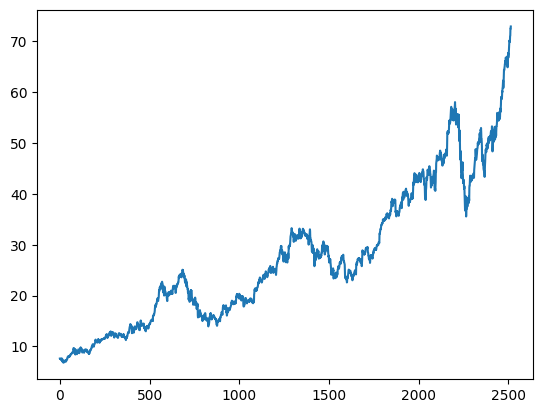

In [26]:
# Plot close column
plt.plot(df.Close)

In [27]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [28]:
# 100-Day Moving Average
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

**Moving Average:** Represents average price of a stock over a period of 100 days. Sum up the closing prices of the last 100 trading days. Divide the total by 100.

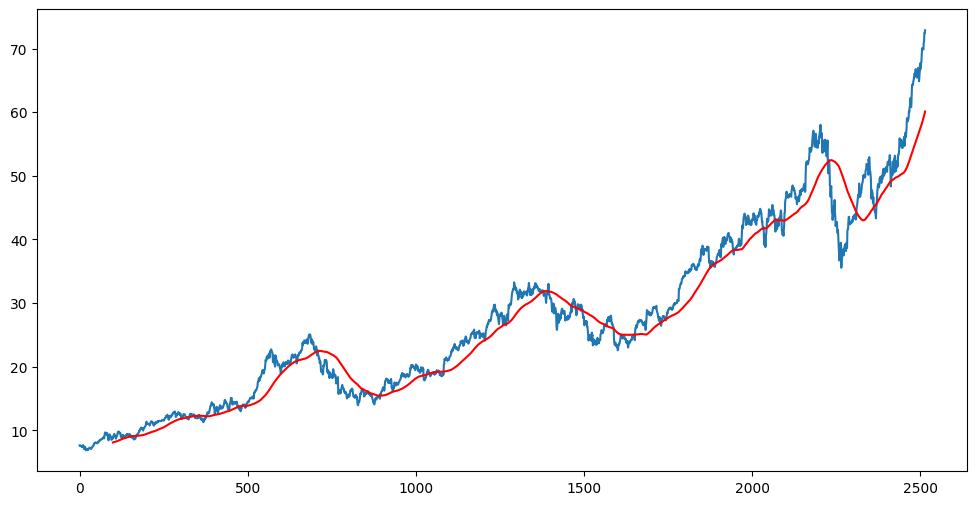

In [29]:
# Plot 100-Day Moving Average (red line)
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [30]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

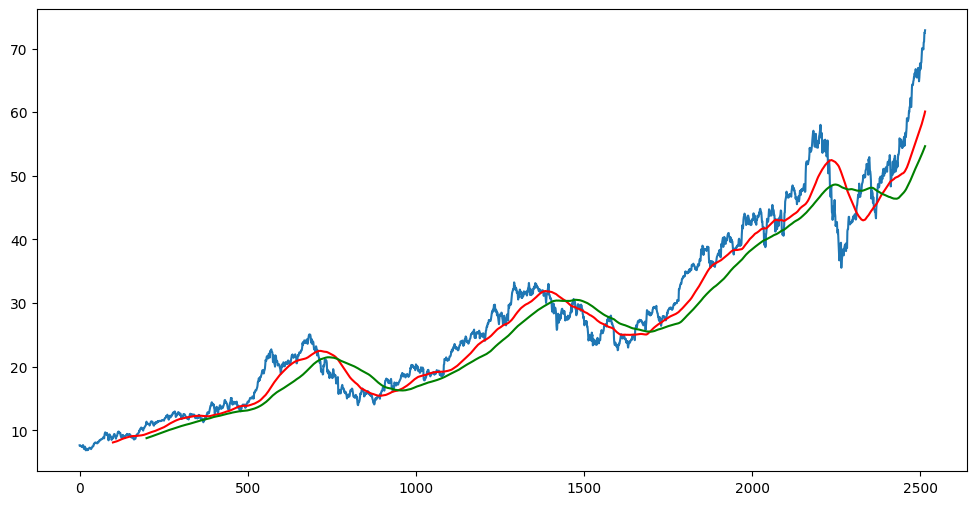

In [31]:
# Plot 200-Day Moving Average (red line)
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [32]:
# Shows us rows & columns
df.shape

(2515, 5)

## Splitting Data into Training and Testing

In [33]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


Prepares the data for machine learning/statistical analysis by dividing it into a training set (70% of the closing price data) and the remaining last 30% of the closing price data from df.
**Training set:** used to fit a model
**Testing set:** used to evaluate the model's performance; ensures that the model's accuracy is tested on data it hasn't seen before

In [34]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [35]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Convert to array
data_training_array =  scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

LSTM networks introduces memory cells, which have the ability to retain information over long sequences. Each memory cell has three components: an input gate, a forget gate, and an output gate (helps regulate the flow of information in and out of the memory cell).

Scales down the data to between 0-1 as outputs. The forget gate decides which information to discard from the memory cell. A value of 0 means the information is ignored, while a value of 1 means it is retained.

In [37]:
data_training_array.shape

(1760, 1)

In [46]:
# Divide into x_train and y_train for Time Series Analysis
x_train = [] # Previous 100 days
y_train = [] # To be predicted (101th day)

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
 
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

Creates 100-day Step, uses previous 100 days to predict one day output (the stock price is dependent on the previous days' prices).
- If predicting 101th day (y_train), uses 1st-100th day as x_train to predict
- If predicting 102th day (y_train), uses 2nd-101th day (the one we predicted) as x_train to predict
This starts and continues until the timeframe that we provided.

In [47]:
x_train.shape

(1660, 100, 1)

## Machine Learning Model

In [41]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [135]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1))) # Predicting 1 Column (Closing)
model.add(Dropout(0.2))

# Second Layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

# Third Layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

# Fourth Layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

# Dense Layer - connects all layers
model.add(Dense(units = 1)) # Predicting only one value - Closing price

C:\Users\mpall\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


This model is structured to handle time series data, with multiple LSTM layers to capture the temporal dependencies in the data (and ReLU activation). The Dropout layers are to prevent overfitting (randomly sets X% of the input units to 0 during each training step).

The Dense layer outputs the predicted closing price for each input sequence.

In [136]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.1517
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0147
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0100
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0104
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0096
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0091
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0091
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0073
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0091
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0079
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0082
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0072
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0072
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0066
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0063


In [138]:
model.save('keras_model.h5')

In [139]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


To predict row 1760+, we need previous the 100 days (from training section), so we must append them. 

In [140]:
past_100_days = data_training.tail(100)

In [141]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [142]:
final_df.head() # Must scale this data down as well

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [143]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [144]:
input_data.shape

(855, 1)

In [145]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [146]:
# Convert to numpy array
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


## Making Predictions

In [147]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [148]:
y_predicted.shape

(755, 1)

In [149]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [150]:
y_predicted # Must scale values up again

array([[0.12066923],
       [0.12140684],
       [0.12210356],
       [0.122729  ],
       [0.12326463],
       [0.12369895],
       [0.12403741],
       [0.12430684],
       [0.12454419],
       [0.12478139],
       [0.12504718],
       [0.12535249],
       [0.12569962],
       [0.12609582],
       [0.12653925],
       [0.12702075],
       [0.1275305 ],
       [0.1280564 ],
       [0.12859312],
       [0.12915629],
       [0.12975472],
       [0.13038515],
       [0.1310289 ],
       [0.13171005],
       [0.13252702],
       [0.13355143],
       [0.13484024],
       [0.1364406 ],
       [0.13838543],
       [0.14068519],
       [0.14332232],
       [0.14626299],
       [0.1494846 ],
       [0.1529707 ],
       [0.15669113],
       [0.16060255],
       [0.1646589 ],
       [0.16881076],
       [0.17299323],
       [0.17713085],
       [0.18115373],
       [0.18500243],
       [0.18865716],
       [0.19209424],
       [0.19530834],
       [0.19829726],
       [0.20105952],
       [0.203

In [151]:
scaler.scale_ # Gives the factor that the values were scaled down by

array([0.02123255])

In [152]:
# Scales values up
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

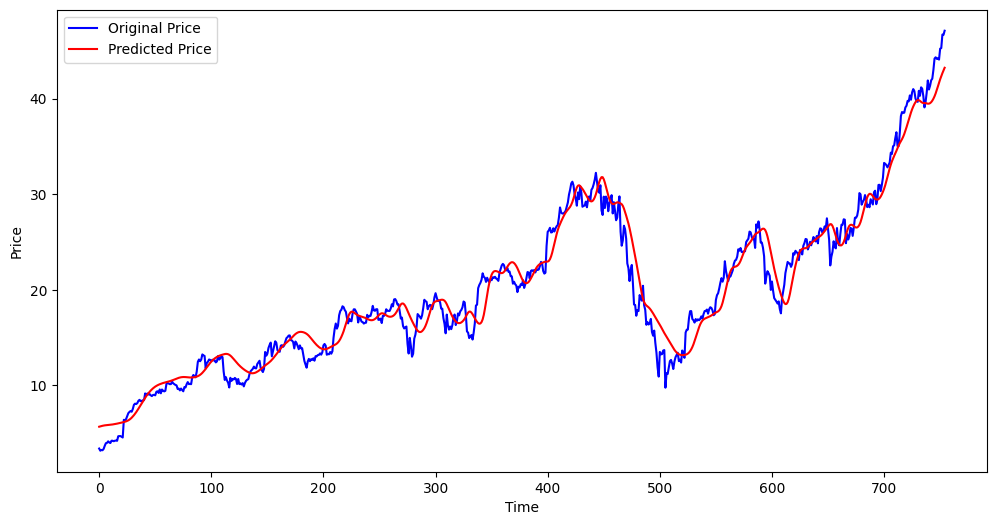

In [153]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()